In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
sns.set_theme()

In [37]:
df_jakarta_full = pd.read_csv('Dataset/Clean/DKI_Full.csv')
df_jakarta_HI_jan_21 = pd.read_csv('Dataset/Clean/DKI_Jan_21.csv')
df_jogja_jan_21 = pd.read_csv('Dataset/Clean/DIY_Jan_21.csv')

# Jakarta Full

In [35]:
df_jakarta_full

,Date,Scope,PM10,PM2.5,SO2,CO,O3,NO2,Max,Critical Component,Category
0,2010-01-01,Bunderan HI,60,94,4,73,27,14,73,CO,Moderate
1,2010-01-02,Bunderan HI,32,94,2,16,33,9,33,O3,Good
2,2010-01-03,Bunderan HI,27,94,2,19,20,9,27,PM10,Good
3,2010-01-04,Bunderan HI,22,94,2,16,15,6,22,PM10,Good
4,2010-01-05,Bunderan HI,25,94,2,17,15,8,25,PM10,Good
...,...,...,...,...,...,...,...,...,...,...,...
4621,2023-11-26,Bunderan HI,55,75,43,15,15,25,75,PM25,Moderate
4622,2023-11-27,Jagakarsa,54,77,56,13,27,16,77,PM25,Moderate
4623,2023-11-28,Bunderan HI,62,96,45,15,29,34,96,PM25,Moderate
4624,2023-11-29,Lubang Buaya,71,105,30,19,22,14,105,PM25,Worst


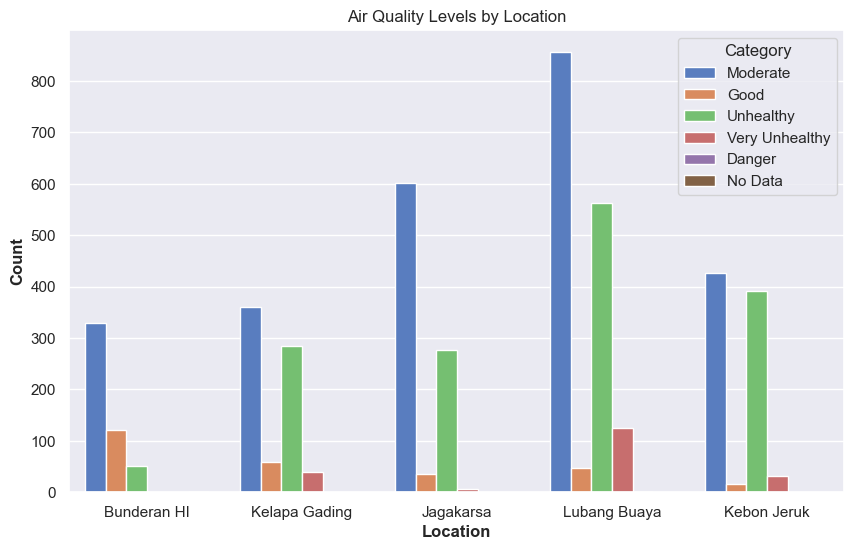

In [83]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df_jakarta_full, x='Scope', hue='Category')
plt.title('Air Quality Levels by Location')
plt.xlabel('Location', fontsize=12, weight='bold')
plt.ylabel('Count', fontsize=12, weight='bold')
plt.legend(title='Category')
plt.show()

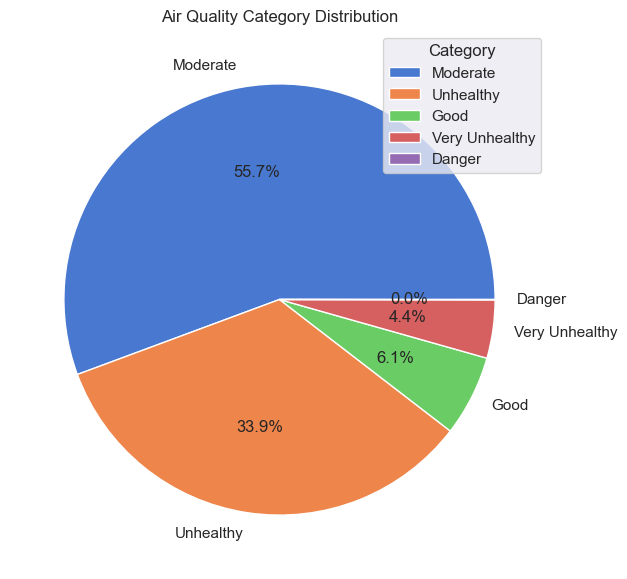

In [62]:
sns.set_palette('muted')
# Get the counts of each category
category_counts = df_jakarta_full['Category'].value_counts()

# Filter out the categories you want to exclude (e.g., 'No Data')
filtered_counts = category_counts[category_counts.index != 'No Data']

# If you want to exclude 'Danger' as well, you can do:
# filtered_counts = category_counts[~category_counts.index.isin(['No Data', 'Danger'])]

# Define a function to show only non-zero percentages
def autopct_func(pct):
    return f'{pct:.1f}%' if pct > 0 else ''

# Plotting the pie chart without text labels
filtered_counts.plot.pie(autopct=autopct_func, figsize=(7, 7), legend=True)
plt.title('Air Quality Category Distribution')
plt.ylabel('')
plt.legend(title='Category', loc='best')  # Legend to show all categories
plt.show()


# Jakarta Januari 2021

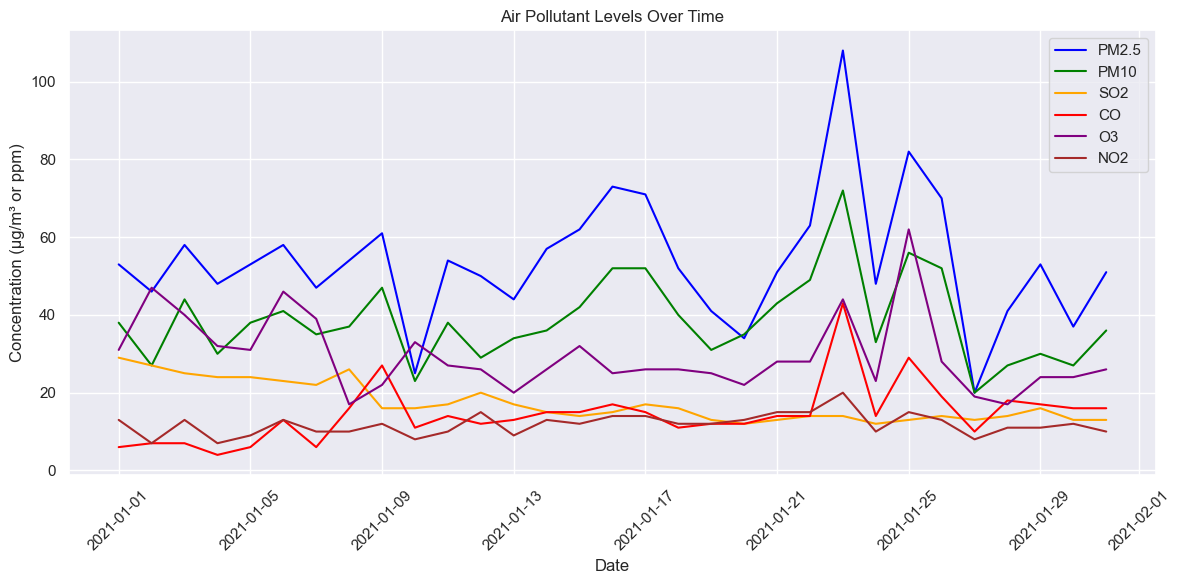

In [64]:
# Assuming 'Date' is in datetime format
df_jakarta_HI_jan_21['Date'] = pd.to_datetime(df_jakarta_HI_jan_21['Date'])

# Set up the plot
plt.figure(figsize=(12, 6))

# Plot each pollutant
plt.plot(df_jakarta_HI_jan_21['Date'], df_jakarta_HI_jan_21['PM2.5'], label='PM2.5', color='blue')
plt.plot(df_jakarta_HI_jan_21['Date'], df_jakarta_HI_jan_21['PM10'], label='PM10', color='green')
plt.plot(df_jakarta_HI_jan_21['Date'], df_jakarta_HI_jan_21['SO2'], label='SO2', color='orange')
plt.plot(df_jakarta_HI_jan_21['Date'], df_jakarta_HI_jan_21['CO'], label='CO', color='red')
plt.plot(df_jakarta_HI_jan_21['Date'], df_jakarta_HI_jan_21['O3'], label='O3', color='purple')
plt.plot(df_jakarta_HI_jan_21['Date'], df_jakarta_HI_jan_21['NO2'], label='NO2', color='brown')

# Customize the plot
plt.xlabel('Date')
plt.ylabel('Concentration (µg/m³ or ppm)')  # Use appropriate units for your data
plt.title('Air Pollutant Levels Over Time')
plt.legend()
plt.grid(True)  # Optional: add grid for better readability
plt.xticks(rotation=45)  # Optional: rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()


In [69]:
df_jan_21_25 = df_jakarta_HI_jan_21[(df_jakarta_HI_jan_21['Date'] >= '2021-01-21') &
                                    (df_jakarta_HI_jan_21['Date'] <= '2021-01-27')]
df_jan_21_25

,Date,PM10,PM2.5,SO2,CO,O3,NO2,Max,Critical Component,Category,City
20,2021-01-21,43,51,13,14,28,15,51,PM25,Moderate,Jakarta
21,2021-01-22,49,63,14,14,28,15,63,PM25,Moderate,Jakarta
22,2021-01-23,72,108,14,43,44,20,108,PM25,Worst,Jakarta
23,2021-01-24,33,48,12,14,23,10,48,PM25,Good,Jakarta
24,2021-01-25,56,82,13,29,62,15,82,PM25,Moderate,Jakarta
25,2021-01-26,52,70,14,19,28,13,70,PM25,Moderate,Jakarta
26,2021-01-27,20,20,13,10,19,8,20,PM10,Good,Jakarta


C:\Users\Administrator\AppData\Local\Temp\ipykernel_18628\1790923134.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_jan_21_25['Date'] = pd.to_datetime(df_jan_21_25['Date'])


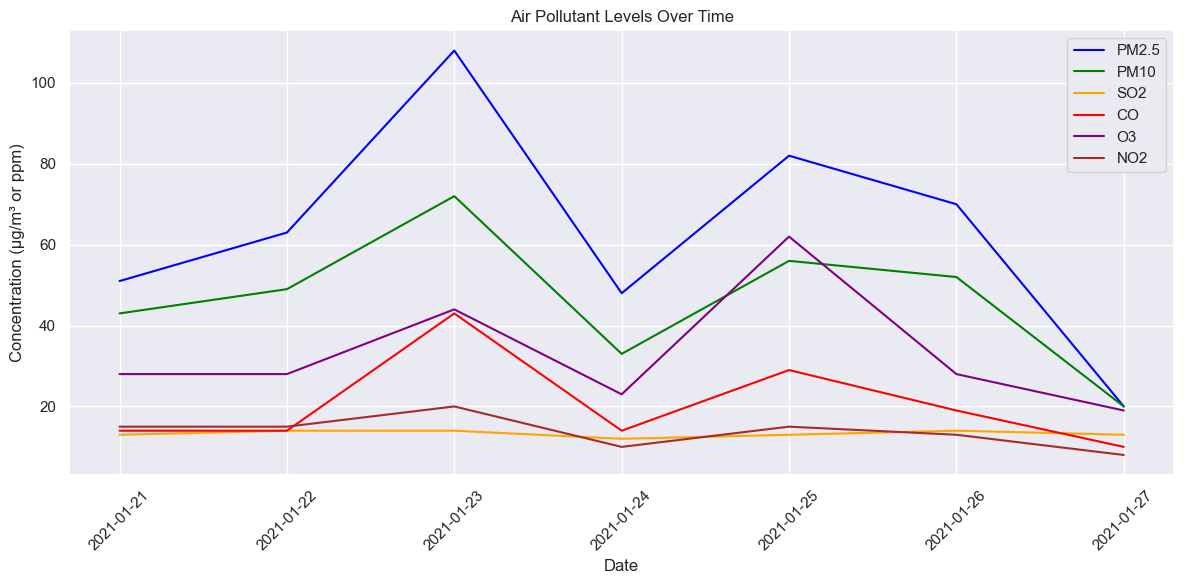

In [71]:
# Assuming 'Date' is in datetime format
df_jan_21_25['Date'] = pd.to_datetime(df_jan_21_25['Date'])

# Set up the plot
plt.figure(figsize=(12, 6))

# Plot each pollutant
plt.plot(df_jan_21_25['Date'], df_jan_21_25['PM2.5'], label='PM2.5', color='blue')
plt.plot(df_jan_21_25['Date'], df_jan_21_25['PM10'], label='PM10', color='green')
plt.plot(df_jan_21_25['Date'], df_jan_21_25['SO2'], label='SO2', color='orange')
plt.plot(df_jan_21_25['Date'], df_jan_21_25['CO'], label='CO', color='red')
plt.plot(df_jan_21_25['Date'], df_jan_21_25['O3'], label='O3', color='purple')
plt.plot(df_jan_21_25['Date'], df_jan_21_25['NO2'], label='NO2', color='brown')

# Customize the plot
plt.xlabel('Date')
plt.ylabel('Concentration (µg/m³ or ppm)')  # Use appropriate units for your data
plt.title('Air Pollutant Levels Over Time')
plt.legend()
plt.grid(True)  # Optional: add grid for better readability
plt.xticks(rotation=45)  # Optional: rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

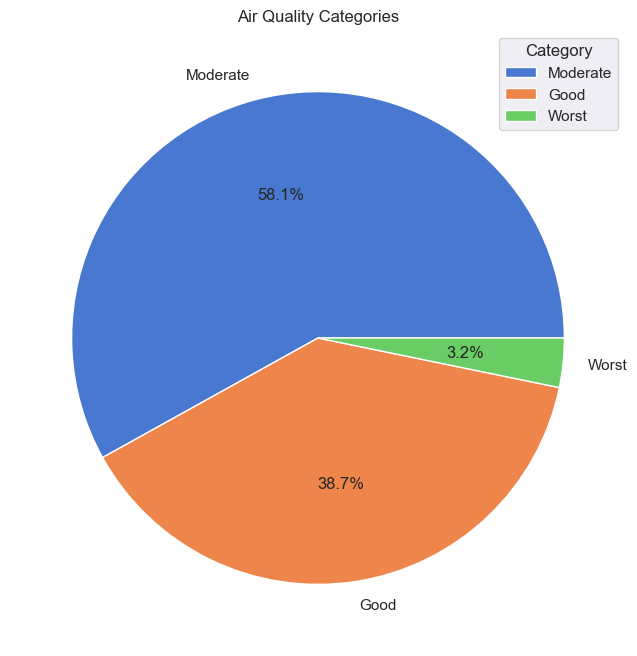

In [85]:
category_counts = df_jakarta_HI_jan_21['Category'].value_counts()
category_counts.plot.pie(autopct='%1.1f%%', figsize=(8, 8))
plt.title('Air Quality Categories')
plt.ylabel('')
plt.legend(title='Category', loc='best') 
plt.show()

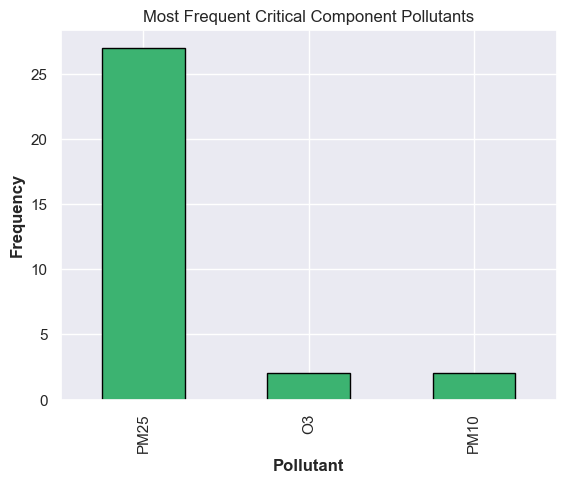

In [84]:
critical_counts = df_jakarta_HI_jan_21['Critical Component'].value_counts()
critical_counts.plot(kind='bar', color='mediumseagreen', edgecolor='black')
plt.title('Most Frequent Critical Component Pollutants')
plt.xlabel('Pollutant', fontsize=12, weight='bold')
plt.ylabel('Frequency', fontsize=12, weight='bold')
plt.show()

# Yogyakarta Januari 2021

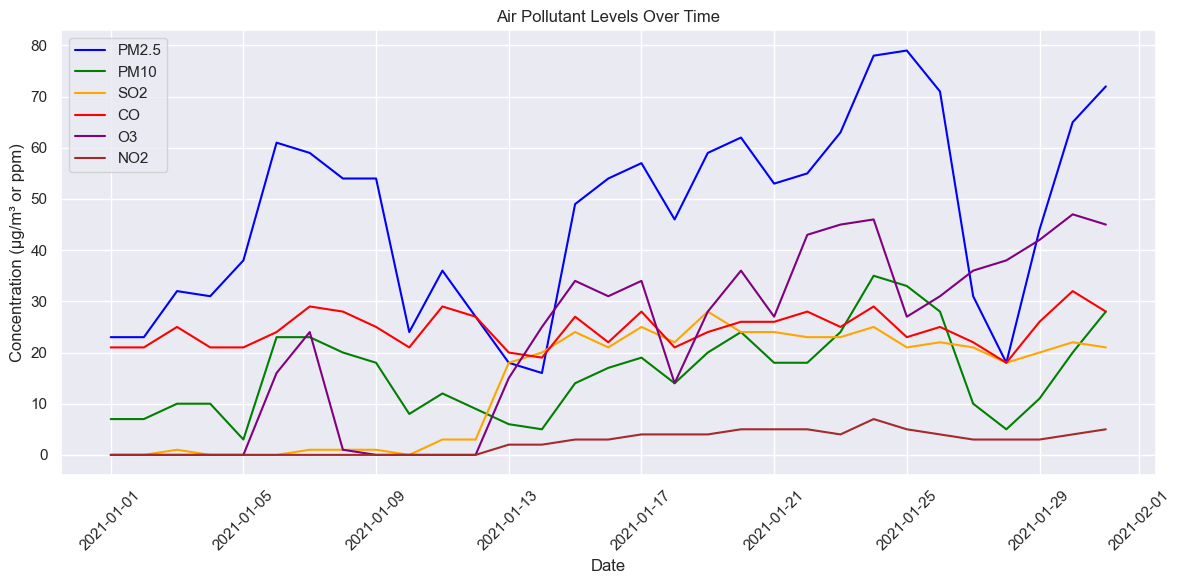

In [86]:
# Assuming 'Date' is in datetime format
df_jogja_jan_21['Date'] = pd.to_datetime(df_jogja_jan_21['Date'])

# Set up the plot
plt.figure(figsize=(12, 6))

# Plot each pollutant
plt.plot(df_jogja_jan_21['Date'], df_jogja_jan_21['PM2.5'], label='PM2.5', color='blue')
plt.plot(df_jogja_jan_21['Date'], df_jogja_jan_21['PM10'], label='PM10', color='green')
plt.plot(df_jogja_jan_21['Date'], df_jogja_jan_21['SO2'], label='SO2', color='orange')
plt.plot(df_jogja_jan_21['Date'], df_jogja_jan_21['CO'], label='CO', color='red')
plt.plot(df_jogja_jan_21['Date'], df_jogja_jan_21['O3'], label='O3', color='purple')
plt.plot(df_jogja_jan_21['Date'], df_jogja_jan_21['NO2'], label='NO2', color='brown')

# Customize the plot
plt.xlabel('Date')
plt.ylabel('Concentration (µg/m³ or ppm)')  # Use appropriate units for your data
plt.title('Air Pollutant Levels Over Time')
plt.legend()
plt.grid(True)  # Optional: add grid for better readability
plt.xticks(rotation=45)  # Optional: rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()


In [88]:
df_jan_21_25_DIY = df_jogja_jan_21[(df_jogja_jan_21['Date'] >= '2021-01-21') &
                                    (df_jogja_jan_21['Date'] <= '2021-01-27')]
df_jan_21_25_DIY

,Date,PM10,PM2.5,SO2,CO,O3,NO2,Max,Critical Component,Category,City
20,2021-01-21,18,53,24,26,27,5,53,PM2.5,Moderate,Yogyakarta
21,2021-01-22,18,55,23,28,43,5,55,PM2.5,Moderate,Yogyakarta
22,2021-01-23,24,63,23,25,45,4,63,PM2.5,Moderate,Yogyakarta
23,2021-01-24,35,78,25,29,46,7,78,PM2.5,Moderate,Yogyakarta
24,2021-01-25,33,79,21,23,27,5,79,PM2.5,Moderate,Yogyakarta
25,2021-01-26,28,71,22,25,31,4,71,PM2.5,Moderate,Yogyakarta
26,2021-01-27,10,31,21,22,36,3,36,O3,Good,Yogyakarta


C:\Users\Administrator\AppData\Local\Temp\ipykernel_18628\32298180.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_jan_21_25_DIY['Date'] = pd.to_datetime(df_jan_21_25_DIY['Date'])


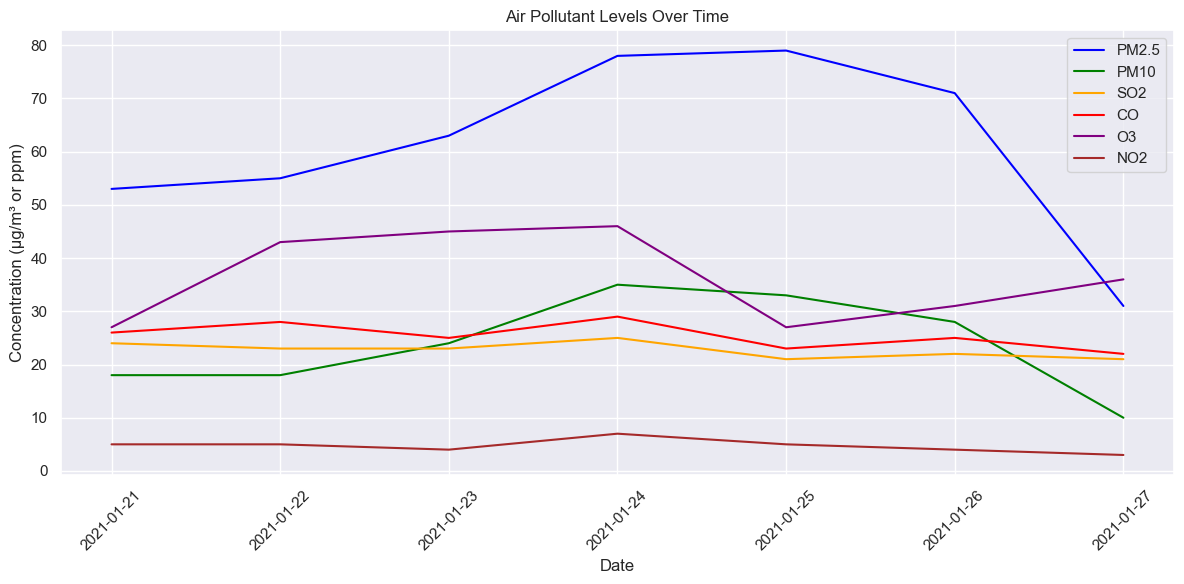

In [89]:
# Assuming 'Date' is in datetime format
df_jan_21_25_DIY['Date'] = pd.to_datetime(df_jan_21_25_DIY['Date'])

# Set up the plot
plt.figure(figsize=(12, 6))

# Plot each pollutant
plt.plot(df_jan_21_25_DIY['Date'], df_jan_21_25_DIY['PM2.5'], label='PM2.5', color='blue')
plt.plot(df_jan_21_25_DIY['Date'], df_jan_21_25_DIY['PM10'], label='PM10', color='green')
plt.plot(df_jan_21_25_DIY['Date'], df_jan_21_25_DIY['SO2'], label='SO2', color='orange')
plt.plot(df_jan_21_25_DIY['Date'], df_jan_21_25_DIY['CO'], label='CO', color='red')
plt.plot(df_jan_21_25_DIY['Date'], df_jan_21_25_DIY['O3'], label='O3', color='purple')
plt.plot(df_jan_21_25_DIY['Date'], df_jan_21_25_DIY['NO2'], label='NO2', color='brown')

# Customize the plot
plt.xlabel('Date')
plt.ylabel('Concentration (µg/m³ or ppm)')  # Use appropriate units for your data
plt.title('Air Pollutant Levels Over Time')
plt.legend()
plt.grid(True)  # Optional: add grid for better readability
plt.xticks(rotation=45)  # Optional: rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

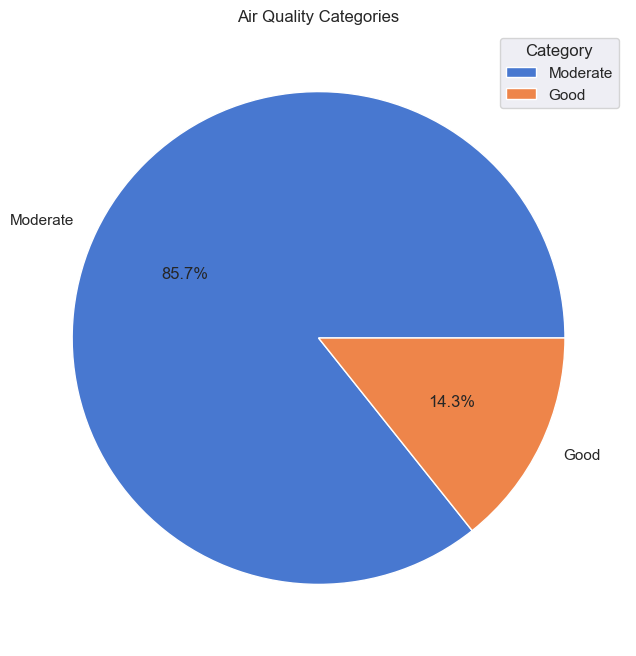

In [90]:
category_counts = df_jan_21_25_DIY['Category'].value_counts()
category_counts.plot.pie(autopct='%1.1f%%', figsize=(8, 8))
plt.title('Air Quality Categories')
plt.ylabel('')
plt.legend(title='Category', loc='best') 
plt.show()

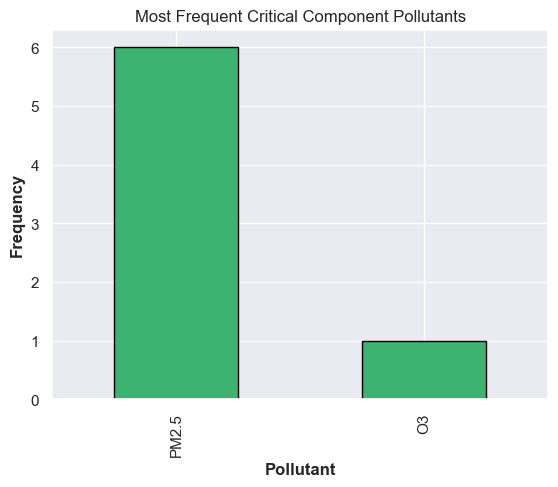

In [91]:
critical_counts = df_jan_21_25_DIY['Critical Component'].value_counts()
critical_counts.plot(kind='bar', color='mediumseagreen', edgecolor='black')
plt.title('Most Frequent Critical Component Pollutants')
plt.xlabel('Pollutant', fontsize=12, weight='bold')
plt.ylabel('Frequency', fontsize=12, weight='bold')
plt.show()

# Line Chart DIY DKI Jan 2021

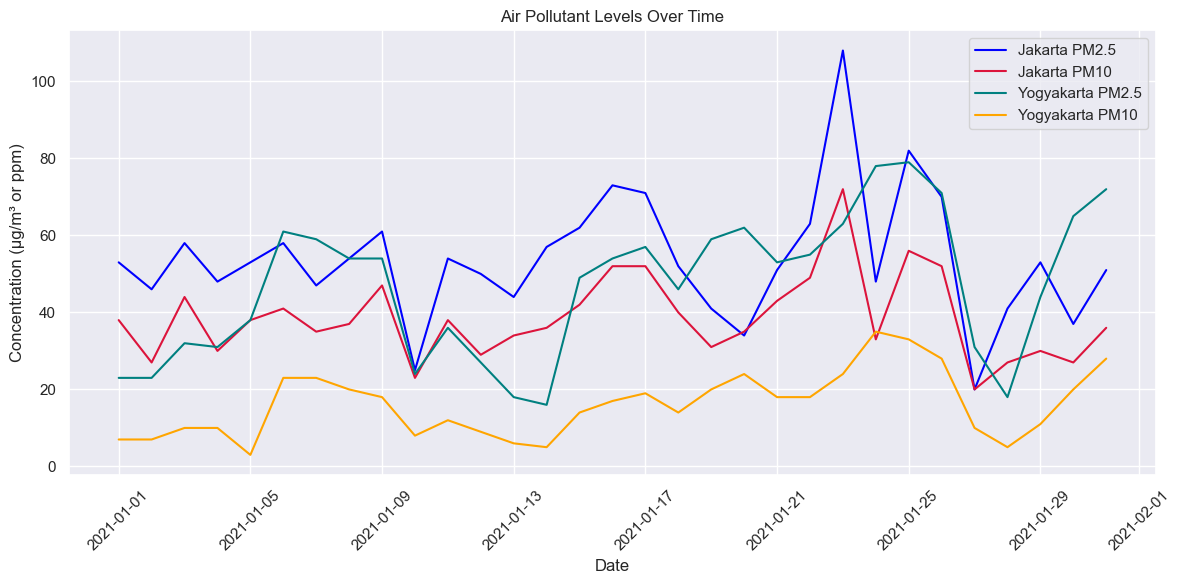

In [99]:

# Set up the plot
plt.figure(figsize=(12, 6))

# Plot each pollutant
plt.plot(df_jakarta_HI_jan_21['Date'], df_jakarta_HI_jan_21['PM2.5'], label='Jakarta PM2.5', color='blue')
plt.plot(df_jakarta_HI_jan_21['Date'], df_jakarta_HI_jan_21['PM10'], label='Jakarta PM10', color='crimson')
plt.plot(df_jogja_jan_21['Date'], df_jogja_jan_21['PM2.5'], label='Yogyakarta PM2.5', color='teal')
plt.plot(df_jogja_jan_21['Date'], df_jogja_jan_21['PM10'], label='Yogyakarta PM10', color='orange')


# Customize the plot
plt.xlabel('Date')
plt.ylabel('Concentration (µg/m³ or ppm)')  # Use appropriate units for your data
plt.title('Air Pollutant Levels Over Time')
plt.legend()
plt.grid(True)  # Optional: add grid for better readability
plt.xticks(rotation=45)  # Optional: rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()